In [96]:
import pandas as pd
import numpy as np
import os

In [ ]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [98]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-23--16h-54m-21s',
 '2025-05-23--16h-54m-26s',
 '2025-05-23--16h-54m-30s',
 '2025-05-23--16h-54m-34s',
 '2025-05-23--16h-54m-37s',
 '2025-05-23--16h-54m-41s',
 '2025-05-23--16h-54m-45s',
 '2025-05-23--16h-54m-49s',
 '2025-05-23--16h-54m-53s',
 '2025-05-23--16h-54m-57s',
 '2025-05-23--16h-55m-01s',
 '2025-05-23--16h-55m-05s',
 '2025-05-23--16h-55m-08s',
 '2025-05-23--16h-55m-12s',
 '2025-05-23--16h-55m-16s',
 '2025-05-23--16h-55m-20s',
 '2025-05-23--16h-55m-24s',
 '2025-05-23--16h-55m-28s',
 '2025-05-23--16h-55m-32s',
 '2025-05-23--16h-55m-36s',
 '2025-05-23--16h-55m-40s',
 '2025-05-23--16h-55m-44s',
 '2025-05-23--16h-55m-47s',
 '2025-05-23--16h-55m-51s',
 '2025-05-23--16h-55m-55s',
 '2025-05-23--16h-55m-59s',
 '2025-05-23--16h-56m-03s',
 '2025-05-23--16h-56m-07s',
 '2025-05-23--16h-56m-11s',
 '2025-05-23--16h-56m-15s',
 '2025-05-23--16h-56m-19s',
 '2025-05-23--16h-56m-23s',
 '2025-05-23--16h-56m-27s',
 '2025-05-23--16h-56m-31s',
 '2025-05-23--16h-56m-35s',
 '2025-05-23--16h-56

In [99]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates_n=40.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates_n=40.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta_estimate_degrees,delta_phi_estimate_degrees,theta,delta_phi,repetitions
0,2025-05-23--16h-54m-21s,2.0,38.0,0.0,0.0,40.0,0.267378,1.570796,15.319620,90.000000,0.000000,0,100
1,2025-05-23--16h-54m-21s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.000000,0,100
2,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.106495,0,100
3,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.106495,0,100
4,2025-05-23--16h-54m-30s,0.5,39.0,0.0,0.5,40.0,0.142615,0.777898,8.171234,44.570266,0.106495,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,2025-05-23--19h-08m-07s,0.0,0.0,40.0,0.0,40.0,3.141593,NaN,180.000000,NaN,3.141593,0,5000
10314,2025-05-23--19h-08m-07s,2.0,0.0,38.0,0.0,40.0,2.874215,1.570796,164.680380,90.000000,3.141593,0,5000
10315,2025-05-23--19h-08m-07s,1.0,0.0,39.0,0.0,40.0,2.998978,1.570796,171.828766,90.000000,3.141593,0,5000
10316,2025-05-23--19h-08m-07s,1.0,0.0,39.0,0.0,40.0,2.998978,1.570796,171.828766,90.000000,3.141593,0,5000


In [100]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta_estimate_degrees,delta_phi_estimate_degrees,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-23--16h-54m-21s,2.0,38.0,0.0,0.0,40.0,0.267378,1.570796,15.319620,90.000000,0.000000,0,100,0.000000,0.0
1,2025-05-23--16h-54m-21s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.000000,0,100,0.000000,0.0
2,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.106495,0,100,6.101695,0.0
3,2025-05-23--16h-54m-30s,0.0,40.0,0.0,0.0,40.0,0.000000,NaN,0.000000,NaN,0.106495,0,100,6.101695,0.0
4,2025-05-23--16h-54m-30s,0.5,39.0,0.0,0.5,40.0,0.142615,0.777898,8.171234,44.570266,0.106495,0,100,6.101695,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,2025-05-23--19h-08m-07s,0.0,0.0,40.0,0.0,40.0,3.141593,NaN,180.000000,NaN,3.141593,0,5000,180.000000,0.0
10314,2025-05-23--19h-08m-07s,2.0,0.0,38.0,0.0,40.0,2.874215,1.570796,164.680380,90.000000,3.141593,0,5000,180.000000,0.0
10315,2025-05-23--19h-08m-07s,1.0,0.0,39.0,0.0,40.0,2.998978,1.570796,171.828766,90.000000,3.141593,0,5000,180.000000,0.0
10316,2025-05-23--19h-08m-07s,1.0,0.0,39.0,0.0,40.0,2.998978,1.570796,171.828766,90.000000,3.141593,0,5000,180.000000,0.0


In [101]:
# only where repetitions > 1000
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

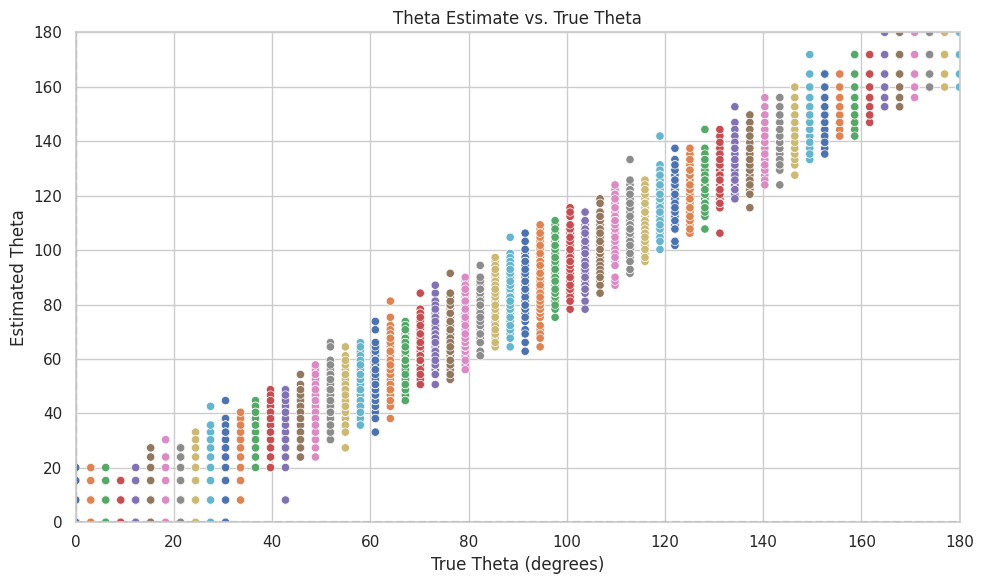

In [102]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta_degrees", y="theta_estimate_degrees", hue="data_dir", palette="deep")
plt.title("Theta Estimate vs. True Theta")
plt.xlabel("True Theta (degrees)")
plt.ylabel("Estimated Theta")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, 180)
plt.ylim(0, 180)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

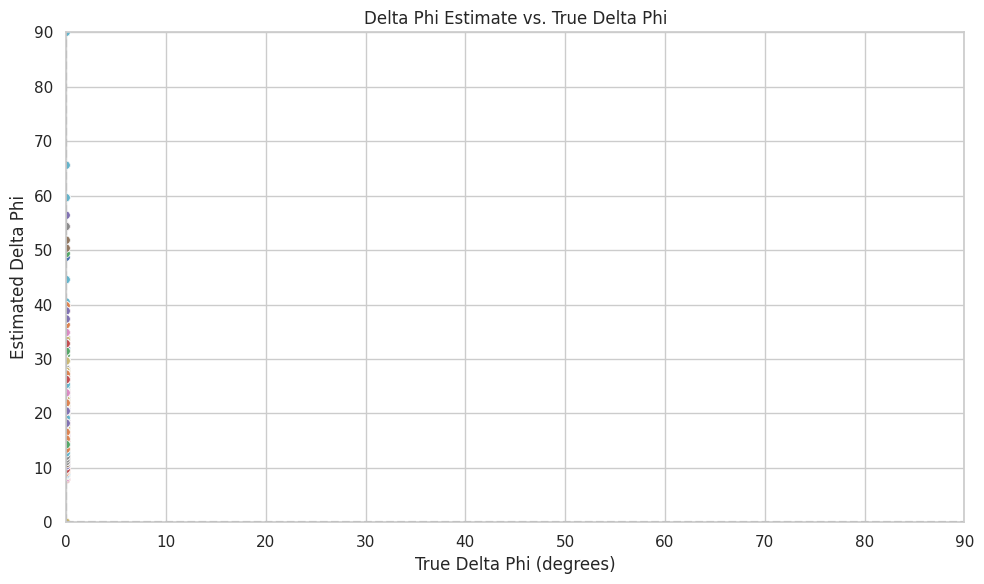

In [103]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi_degrees", y="delta_phi_estimate_degrees", hue="data_dir", palette="deep")
plt.title("Delta Phi Estimate vs. True Delta Phi")
plt.xlabel("True Delta Phi (degrees)")
plt.ylabel("Estimated Delta Phi")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, 90)
plt.ylim(0, 90)

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [104]:
estimates_summary_df = estimates_df.groupby("data_dir").agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"],
    "N": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory theta_estimate                      \
                                      mean       std       var   
0   2025-05-23--17h-24m-53s       0.090912  0.085134  0.007248   
1   2025-05-23--17h-27m-00s       0.108921  0.091058  0.008292   
2   2025-05-23--17h-28m-51s       0.110308  0.095250  0.009073   
3   2025-05-23--17h-30m-41s       0.119147  0.089424  0.007997   
4   2025-05-23--17h-32m-32s       0.149127  0.093869  0.008811   
5   2025-05-23--17h-34m-23s       0.187263  0.103210  0.010652   
6   2025-05-23--17h-36m-14s       0.244806  0.098449  0.009692   
7   2025-05-23--17h-38m-05s       0.272990  0.102303  0.010466   
8   2025-05-23--17h-39m-56s       0.323545  0.106870  0.011421   
9   2025-05-23--17h-41m-47s       0.397032  0.099701  0.009940   
10  2025-05-23--17h-43m-38s       0.437188  0.108822  0.011842   
11  2025-05-23--17h-45m-29s       0.478845  0.096708  0.009353   
12  2025-05-23--17h-47m-20s       0.535627  0.094973  0.009020   
13  2025-05-23--17h-49m-11s       0.586717  0.093435  0.008730   
14  2025-05-23--17h-51m-02s       0.615825  0.105089  0.011044   
15  2025-05-23--17h-52m-53s       0.684140  0.098005  0.009605   
16  2025-05-23--17h-54m-44s       0.733299  0.105365  0.011102   
17  2025-05-23--17h-56m-35s       0.789188  0.107097  0.011470   
18  2025-05-23--17h-58m-27s       0.837218  0.106788  0.011404   
19  2025-05-23--18h-00m-17s       0.883556  0.097012  0.009411   
20  2025-05-23--18h-02m-09s       0.940100  0.118144  0.013958   
21  2025-05-23--18h-04m-00s       1.001367  0.121275  0.014708   
22  2025-05-23--18h-05m-51s       1.033604  0.105584  0.011148   
23  2025-05-23--18h-07m-42s       1.116914  0.108420  0.011755   
24  2025-05-23--18h-09m-34s       1.166530  0.110172  0.012138   
25  2025-05-23--18h-11m-25s       1.215092  0.120084  0.014420   
26  2025-05-23--18h-13m-17s       1.287205  0.108084  0.011682   
27  2025-05-23--18h-15m-08s       1.345840  0.119692  0.014326   
28  2025-05-23--18h-16m-59s       1.383681  0.113770  0.012944   
29  2025-05-23--18h-18m-47s       1.459975  0.117874  0.013894   
30  2025-05-23--18h-20m-26s       1.508804  0.118903  0.014138   
31  2025-05-23--18h-22m-05s       1.565418  0.135668  0.018406   
32  2025-05-23--18h-23m-43s       1.627884  0.117788  0.013874   
33  2025-05-23--18h-25m-22s       1.677207  0.129644  0.016808   
34  2025-05-23--18h-27m-01s       1.741049  0.124168  0.015418   
35  2025-05-23--18h-28m-41s       1.793943  0.119058  0.014175   
36  2025-05-23--18h-30m-20s       1.866156  0.123894  0.015350   
37  2025-05-23--18h-31m-59s       1.901164  0.125523  0.015756   
38  2025-05-23--18h-33m-37s       1.952785  0.111475  0.012427   
39  2025-05-23--18h-35m-16s       2.042686  0.113258  0.012827   
40  2025-05-23--18h-36m-55s       2.092675  0.114281  0.013060   
41  2025-05-23--18h-38m-34s       2.137338  0.111339  0.012396   
42  2025-05-23--18h-40m-12s       2.194188  0.109086  0.011900   
43  2025-05-23--18h-41m-51s       2.264892  0.110385  0.012185   
44  2025-05-23--18h-43m-30s       2.310238  0.109699  0.012034   
45  2025-05-23--18h-45m-09s       2.364040  0.110759  0.012267   
46  2025-05-23--18h-46m-47s       2.435476  0.095882  0.009193   
47  2025-05-23--18h-48m-26s       2.472888  0.104429  0.010906   
48  2025-05-23--18h-50m-05s       2.548153  0.098626  0.009727   
49  2025-05-23--18h-51m-43s       2.601723  0.099741  0.009948   
50  2025-05-23--18h-53m-21s       2.652498  0.109855  0.012068   
51  2025-05-23--18h-55m-00s       2.696117  0.095746  0.009167   
52  2025-05-23--18h-56m-38s       2.754462  0.111494  0.012431   
53  2025-05-23--18h-58m-17s       2.801511  0.097032  0.009415   
54  2025-05-23--18h-59m-55s       2.870983  0.104303  0.010879   
55  2025-05-23--19h-01m-34s       2.905641  0.104140  0.010845   
56  2025-05-23--19h-03m-12s       2.947353  0.092471  0.008551   
57  2025-05-23--19h-04m-50s       2.996164  0.090660  0.008219   
58  2025-05-23--19h-06m-29s       3.012054  0.095722 

In [105]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"]["mean"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]["mean"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory theta_estimate                      \
                                      mean       std       var   
0   2025-05-23--17h-24m-53s       0.090912  0.085134  0.007248   
1   2025-05-23--17h-27m-00s       0.108921  0.091058  0.008292   
2   2025-05-23--17h-28m-51s       0.110308  0.095250  0.009073   
3   2025-05-23--17h-30m-41s       0.119147  0.089424  0.007997   
4   2025-05-23--17h-32m-32s       0.149127  0.093869  0.008811   
5   2025-05-23--17h-34m-23s       0.187263  0.103210  0.010652   
6   2025-05-23--17h-36m-14s       0.244806  0.098449  0.009692   
7   2025-05-23--17h-38m-05s       0.272990  0.102303  0.010466   
8   2025-05-23--17h-39m-56s       0.323545  0.106870  0.011421   
9   2025-05-23--17h-41m-47s       0.397032  0.099701  0.009940   
10  2025-05-23--17h-43m-38s       0.437188  0.108822  0.011842   
11  2025-05-23--17h-45m-29s       0.478845  0.096708  0.009353   
12  2025-05-23--17h-47m-20s       0.535627  0.094973  0.009020   
13  2025-05-23--17h-49m-11s       0.586717  0.093435  0.008730   
14  2025-05-23--17h-51m-02s       0.615825  0.105089  0.011044   
15  2025-05-23--17h-52m-53s       0.684140  0.098005  0.009605   
16  2025-05-23--17h-54m-44s       0.733299  0.105365  0.011102   
17  2025-05-23--17h-56m-35s       0.789188  0.107097  0.011470   
18  2025-05-23--17h-58m-27s       0.837218  0.106788  0.011404   
19  2025-05-23--18h-00m-17s       0.883556  0.097012  0.009411   
20  2025-05-23--18h-02m-09s       0.940100  0.118144  0.013958   
21  2025-05-23--18h-04m-00s       1.001367  0.121275  0.014708   
22  2025-05-23--18h-05m-51s       1.033604  0.105584  0.011148   
23  2025-05-23--18h-07m-42s       1.116914  0.108420  0.011755   
24  2025-05-23--18h-09m-34s       1.166530  0.110172  0.012138   
25  2025-05-23--18h-11m-25s       1.215092  0.120084  0.014420   
26  2025-05-23--18h-13m-17s       1.287205  0.108084  0.011682   
27  2025-05-23--18h-15m-08s       1.345840  0.119692  0.014326   
28  2025-05-23--18h-16m-59s       1.383681  0.113770  0.012944   
29  2025-05-23--18h-18m-47s       1.459975  0.117874  0.013894   
30  2025-05-23--18h-20m-26s       1.508804  0.118903  0.014138   
31  2025-05-23--18h-22m-05s       1.565418  0.135668  0.018406   
32  2025-05-23--18h-23m-43s       1.627884  0.117788  0.013874   
33  2025-05-23--18h-25m-22s       1.677207  0.129644  0.016808   
34  2025-05-23--18h-27m-01s       1.741049  0.124168  0.015418   
35  2025-05-23--18h-28m-41s       1.793943  0.119058  0.014175   
36  2025-05-23--18h-30m-20s       1.866156  0.123894  0.015350   
37  2025-05-23--18h-31m-59s       1.901164  0.125523  0.015756   
38  2025-05-23--18h-33m-37s       1.952785  0.111475  0.012427   
39  2025-05-23--18h-35m-16s       2.042686  0.113258  0.012827   
40  2025-05-23--18h-36m-55s       2.092675  0.114281  0.013060   
41  2025-05-23--18h-38m-34s       2.137338  0.111339  0.012396   
42  2025-05-23--18h-40m-12s       2.194188  0.109086  0.011900   
43  2025-05-23--18h-41m-51s       2.264892  0.110385  0.012185   
44  2025-05-23--18h-43m-30s       2.310238  0.109699  0.012034   
45  2025-05-23--18h-45m-09s       2.364040  0.110759  0.012267   
46  2025-05-23--18h-46m-47s       2.435476  0.095882  0.009193   
47  2025-05-23--18h-48m-26s       2.472888  0.104429  0.010906   
48  2025-05-23--18h-50m-05s       2.548153  0.098626  0.009727   
49  2025-05-23--18h-51m-43s       2.601723  0.099741  0.009948   
50  2025-05-23--18h-53m-21s       2.652498  0.109855  0.012068   
51  2025-05-23--18h-55m-00s       2.696117  0.095746  0.009167   
52  2025-05-23--18h-56m-38s       2.754462  0.111494  0.012431   
53  2025-05-23--18h-58m-17s       2.801511  0.097032  0.009415   
54  2025-05-23--18h-59m-55s       2.870983  0.104303  0.010879   
55  2025-05-23--19h-01m-34s       2.905641  0.104140  0.010845   
56  2025-05-23--19h-03m-12s       2.947353  0.092471  0.008551   
57  2025-05-23--19h-04m-50s       2.996164  0.090660  0.008219   
58  2025-05-23--19h-06m-29s       3.012054  0.095722 

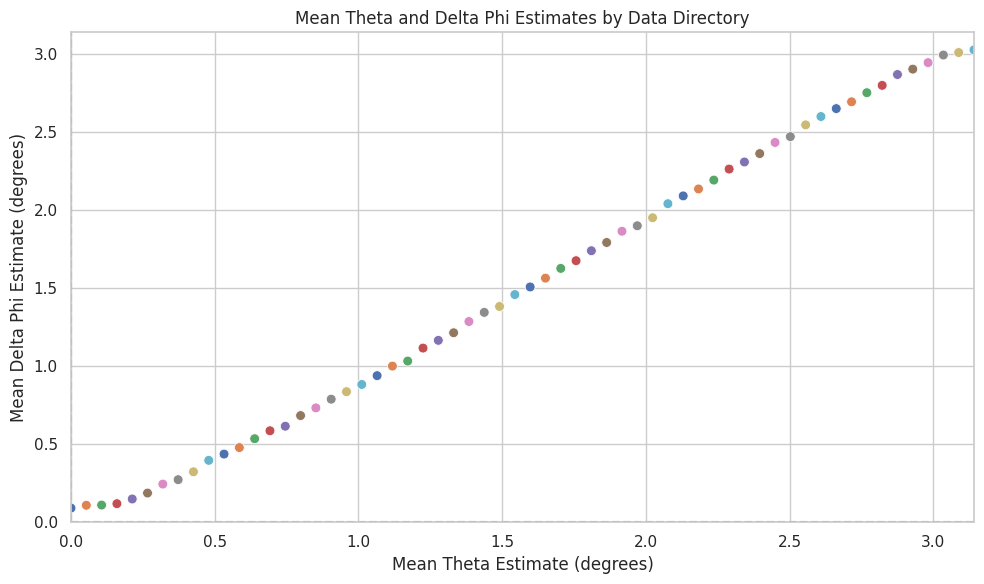

In [106]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="Data Directory", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

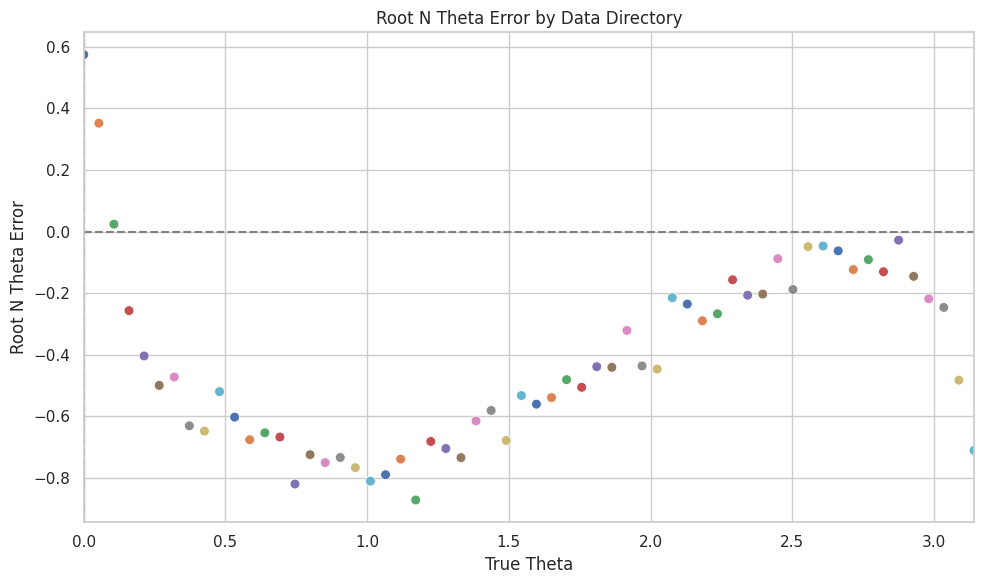

In [107]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="Data Directory", palette="deep", s=50)
plt.title("Root N Theta Error by Data Directory")
plt.xlabel("True Theta")
plt.ylabel("Root N Theta Error")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

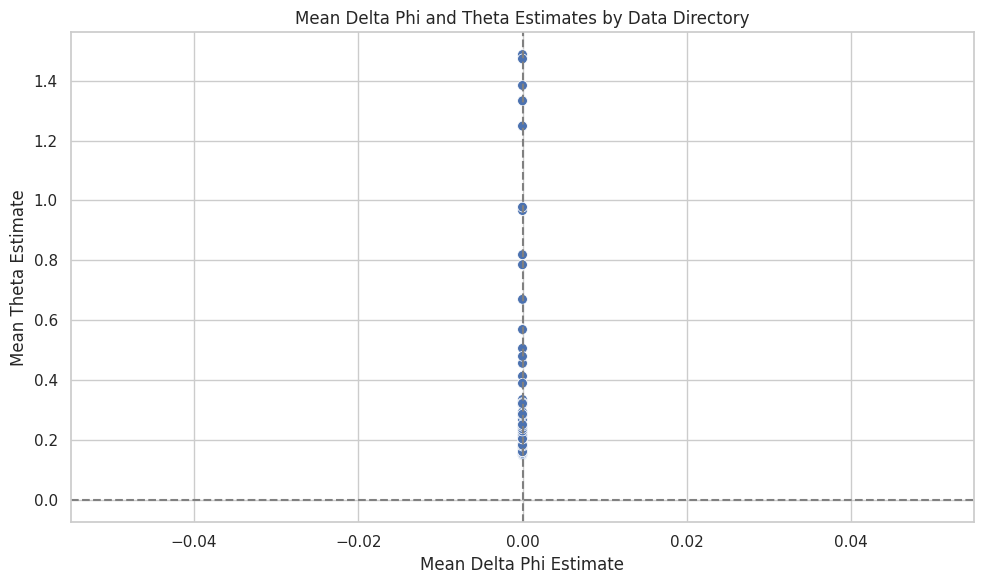

In [108]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"]["mean"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

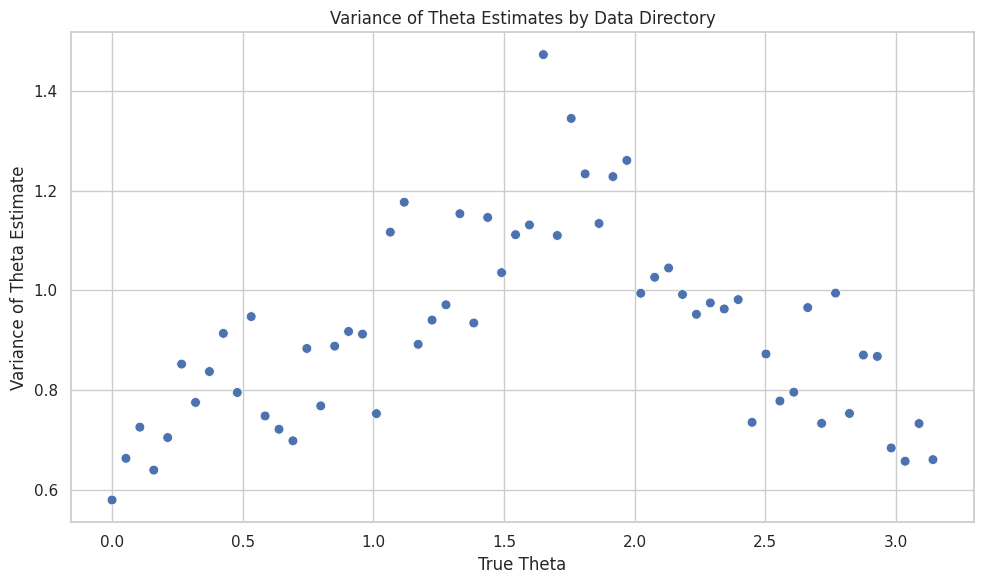

In [109]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                  # N
                hue=estimates_summary_df["N"]["mean"].astype(str),
                palette="deep", s=50)
plt.title("Variance of Theta Estimates by Data Directory")
plt.xlabel("True Theta")
plt.ylabel("Variance of Theta Estimate")

plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()